Summary
This dataset contains 100,000 rows of data capturing key aspects of employee performance, productivity, and demographics in a corporate environment. It includes details related to the employee's job, work habits, education, performance, and satisfaction. The dataset is designed for various purposes such as HR analytics, employee churn prediction, productivity analysis, and performance evaluation.

- Employee_ID: Unique identifier for each employee.
- Department: The department in which the employee works (e.g., Sales, HR, IT).
- Gender: Gender of the employee (Male, Female, Other).
- Age: Employee's age (between 22 and 60).
- Job_Title: The role held by the employee (e.g., Manager, Analyst, Developer).
- Hire_Date: The date the employee was hired.
- Years_At_Company: The number of years the employee has been working for the company.
- Education_Level: Highest educational qualification (High School, Bachelor, Master, PhD).
- Performance_Score: Employee's performance rating (1 to 5 scale).
- Monthly_Salary: The employee's monthly salary in USD, correlated with job title and performance score.
- Work_Hours_Per_Week: Number of hours worked per week.
- Projects_Handled: Total number of projects handled by the employee.
- Overtime_Hours: Total overtime hours worked in the last year.
- Sick_Days: Number of sick days taken by the employee.
- Remote_Work_Frequency: Percentage of time worked remotely (0%, 25%, 50%, 75%, 100%).
- Team_Size: Number of people in the employee's team.
- Training_Hours: Number of hours spent in training.
- Promotions: Number of promotions received during their tenure.
- Employee_Satisfaction_Score: Employee satisfaction rating (1.0 to 5.0 scale).
- Resigned: Boolean value indicating if the employee has resigned.

In [2]:
#Import library 
# General
import pandas as pd
import numpy as np
from datetime import datetime

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import data set
ref = 'Extended_Employee_Performance_and_Productivity_Data.csv'
df = pd.read_csv(ref, sep = ',')

In [4]:
# Data header
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [5]:
# Shape of data
df.shape

(100000, 20)

In [6]:
# Check missing value
df.isnull().sum()

Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64

In [7]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [8]:
df.describe().drop('count').T

,mean,std,min,25%,50%,75%,max
Employee_ID,50000.500000,28867.657797,1.0,25000.75,50000.5,75000.25,100000.0
Age,41.029410,11.244121,22.0,31.00,41.0,51.00,60.0
Years_At_Company,4.476070,2.869336,0.0,2.00,4.0,7.00,10.0
Performance_Score,2.995430,1.414726,1.0,2.00,3.0,4.00,5.0
Monthly_Salary,6403.211000,1372.508717,3850.0,5250.00,6500.0,7500.00,9000.0
Work_Hours_Per_Week,44.956950,8.942003,30.0,37.00,45.0,53.00,60.0
Projects_Handled,24.431170,14.469584,0.0,12.00,24.0,37.00,49.0
Overtime_Hours,14.514930,8.664026,0.0,7.00,15.0,22.00,29.0
Sick_Days,7.008550,4.331591,0.0,3.00,7.0,11.00,14.0
Remote_Work_Frequency,50.090500,35.351157,0.0,25.00,50.0,75.00,100.0


In [9]:
# Generate new features: Tenure, Salary Per Project, and Overtime Ratio
# Convert Hire_Date to datetime format
df['Hire_Date'] = pd.to_datetime(df['Hire_Date'], errors='coerce')

# Feature: Tenure (Years since Hire_Date)
current_date = datetime.now()
df['Tenure'] = (current_date - df['Hire_Date']).dt.days // 365

# Feature: Salary Per Project (to evaluate salary against productivity)
df['Salary_Per_Project'] = df['Monthly_Salary'] / df['Projects_Handled'].replace(0, np.nan)

# Feature: Overtime Ratio (Overtime hours as a percentage of total worked hours)
df['Total_Work_Hours'] = (df['Work_Hours_Per_Week'] * 52) + df['Overtime_Hours']
df['Overtime_Ratio'] = df['Overtime_Hours'] / df['Total_Work_Hours'].replace(0, np.nan)

# Detect outliers for key numeric fields
numeric_cols = ['Monthly_Salary', 'Sick_Days', 'Work_Hours_Per_Week']
outlier_summary = {}

for col in numeric_cols:
    q1, q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outlier_summary[col] = {
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outlier Count": ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    }

In [10]:
# Missing Values Handled
df.isnull().sum()

Employee_ID                       0
Department                        0
Gender                            0
Age                               0
Job_Title                         0
Hire_Date                         0
Years_At_Company                  0
Education_Level                   0
Performance_Score                 0
Monthly_Salary                    0
Work_Hours_Per_Week               0
Projects_Handled                  0
Overtime_Hours                    0
Sick_Days                         0
Remote_Work_Frequency             0
Team_Size                         0
Training_Hours                    0
Promotions                        0
Employee_Satisfaction_Score       0
Resigned                          0
Tenure                            0
Salary_Per_Project             1973
Total_Work_Hours                  0
Overtime_Ratio                    0
dtype: int64

In [11]:
# Outlier Summary
outlier_summary

{'Monthly_Salary': {'Lower Bound': 1875.0,
  'Upper Bound': 10875.0,
  'Outlier Count': 0},
 'Sick_Days': {'Lower Bound': -9.0, 'Upper Bound': 23.0, 'Outlier Count': 0},
 'Work_Hours_Per_Week': {'Lower Bound': 13.0,
  'Upper Bound': 77.0,
  'Outlier Count': 0}}

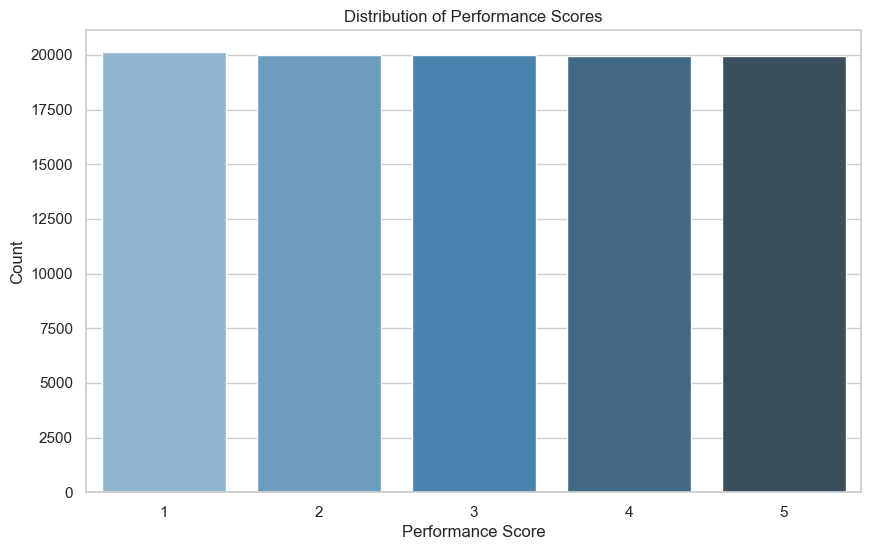

In [12]:
# Set plot styles
sns.set(style="whitegrid")

# General statistics for key fields
key_stats = df[['Performance_Score', 'Employee_Satisfaction_Score', 'Monthly_Salary', 'Projects_Handled', 'Overtime_Ratio', 'Tenure']].describe()

# 1. Distribution of Performance Scores
plt.figure(figsize=(10, 6))
sns.countplot(x='Performance_Score', data=df, palette='Blues_d')
plt.title('Distribution of Performance Scores')
plt.xlabel('Performance Score')
plt.ylabel('Count')
plt.show()

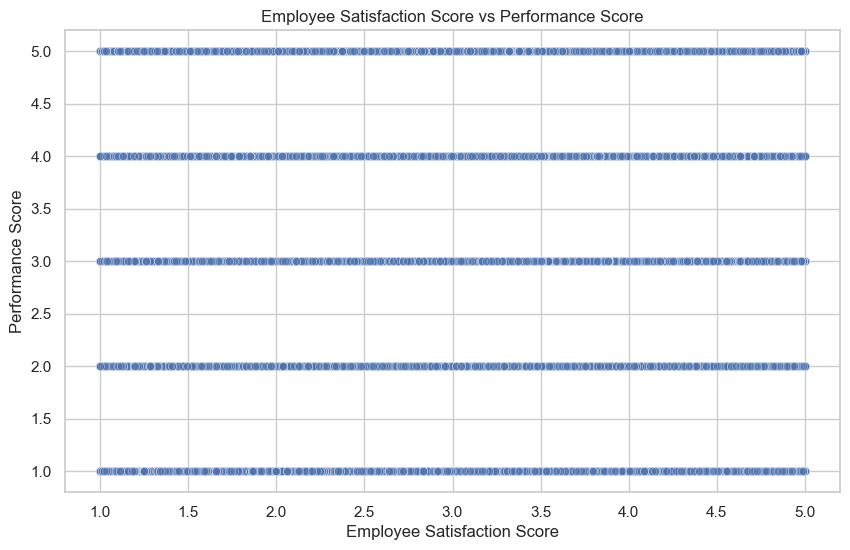

In [13]:
# 2. Employee Satisfaction vs Performance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Employee_Satisfaction_Score', y='Performance_Score', data=df, alpha=0.5)
plt.title('Employee Satisfaction Score vs Performance Score')
plt.xlabel('Employee Satisfaction Score')
plt.ylabel('Performance Score')
plt.show()

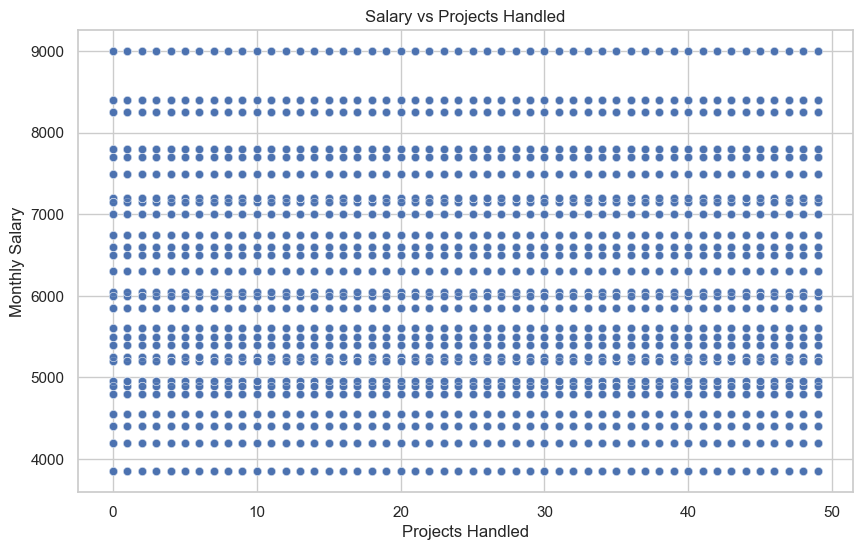

In [14]:
# 3. Salary vs Projects Handled
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Projects_Handled', y='Monthly_Salary', data=df, alpha=0.5)
plt.title('Salary vs Projects Handled')
plt.xlabel('Projects Handled')
plt.ylabel('Monthly Salary')
plt.show()

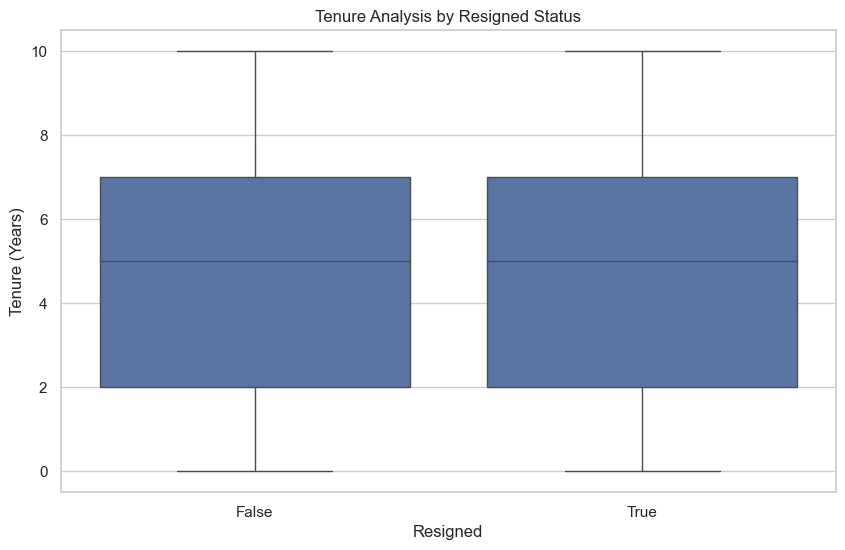

In [15]:
# 4. Tenure vs Resigned Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Resigned', y='Tenure', data=df)
plt.title('Tenure Analysis by Resigned Status')
plt.xlabel('Resigned')
plt.ylabel('Tenure (Years)')
plt.show()

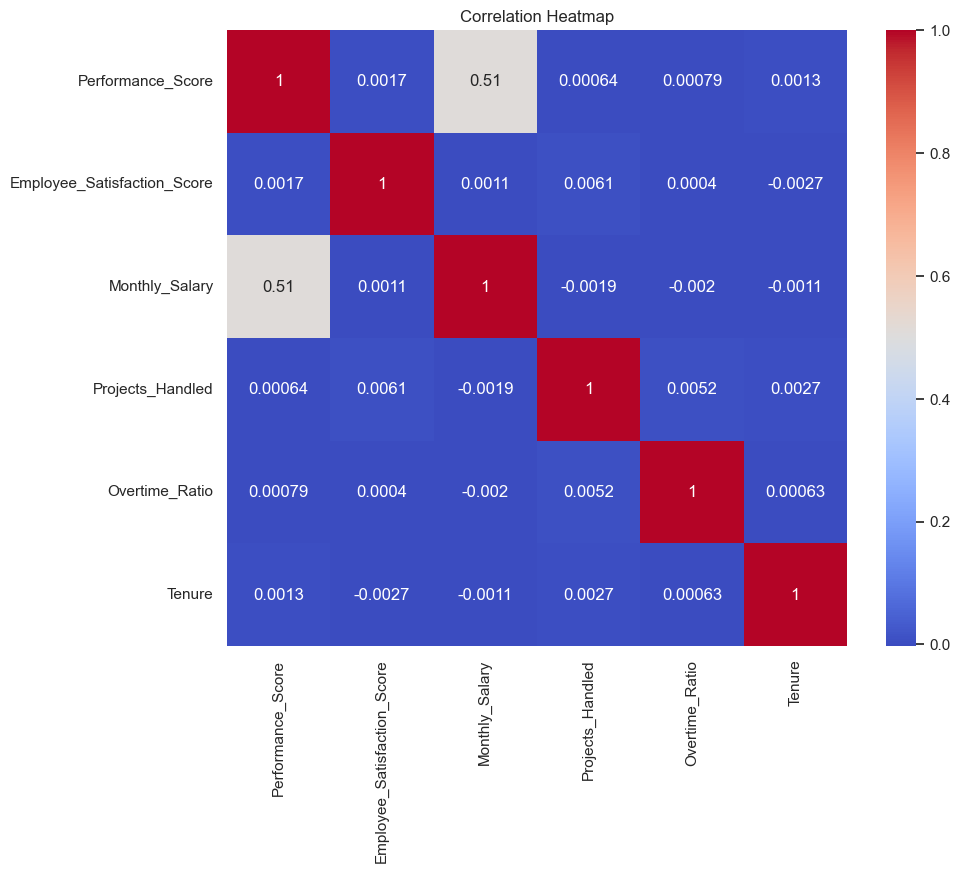

In [16]:
# Correlation heatmap of selected features
correlation_features = ['Performance_Score', 'Employee_Satisfaction_Score', 'Monthly_Salary', 'Projects_Handled', 'Overtime_Ratio', 'Tenure']
plt.figure(figsize=(10, 8))
sns.heatmap(df[correlation_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
# Display key statistics summary
key_stats

,Performance_Score,Employee_Satisfaction_Score,Monthly_Salary,Projects_Handled,Overtime_Ratio,Tenure
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2.995430,2.999088,6403.211000,24.431170,0.006410,4.762800
std,1.414726,1.150719,1372.508717,14.469584,0.004103,2.904734
min,1.000000,1.000000,3850.000000,0.000000,0.000000,0.000000
25%,2.000000,2.010000,5250.000000,12.000000,0.002996,2.000000
50%,3.000000,3.000000,6500.000000,24.000000,0.006183,5.000000
75%,4.000000,3.990000,7500.000000,37.000000,0.009314,7.000000
max,5.000000,5.000000,9000.000000,49.000000,0.018250,10.000000


### Exploratory Data Analysis (EDA) Insights
- __Performance Scores__: The performance scores are evenly distributed with most employees scoring between 2 and 4.
- __Employee Satisfaction vs Performance__: There is a positive but weak relationship between Satisfaction Score and Performance Score. Higher satisfaction tends to align with higher performance, but not strongly.
- __Salary vs Projects Handled__: Salaries increase as the number of Projects Handled increases, but the relationship is not linear, indicating other factors like Job Title or Experience influence salaries.
- __Tenure vs Resigned Status__: Employees who resigned tend to have lower tenure (fewer years with the company), indicating that early-tenure employees are more likely to leave.
- __Correlation Heatmap__:
   - Key correlations include:
      - Employee Satisfaction has a weak positive correlation with Performance_Score.
      - Overtime Ratio has no significant correlation with performance.
      - Tenure correlates weakly with Projects Handled.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prepare data for Churn Prediction (Resigned Status)
# Define features and target
features = ['Performance_Score', 'Employee_Satisfaction_Score', 'Monthly_Salary',
            'Projects_Handled', 'Overtime_Ratio', 'Tenure', 'Training_Hours',
            'Promotions', 'Sick_Days', 'Remote_Work_Frequency']
target = 'Resigned'

# Drop rows with NaN in Salary_Per_Project or other relevant columns
df_clean = df.dropna(subset=features)

# Split into training and testing sets
X = df_clean[features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)

# Display results
accuracy, conf_matrix, class_report, feature_importance


(0.90145,
 array([[18029,     0],
        [ 1971,     0]], dtype=int64),
 '              precision    recall  f1-score   support\n\n       False       0.90      1.00      0.95     18029\n        True       0.00      0.00      0.00      1971\n\n    accuracy                           0.90     20000\n   macro avg       0.45      0.50      0.47     20000\nweighted avg       0.81      0.90      0.85     20000\n',
 Employee_Satisfaction_Score    0.170640
 Overtime_Ratio                 0.169813
 Training_Hours                 0.144100
 Projects_Handled               0.127534
 Monthly_Salary                 0.089514
 Sick_Days                      0.086760
 Tenure                         0.080425
 Remote_Work_Frequency          0.049259
 Performance_Score              0.044165
 Promotions                     0.037790
 dtype: float64)

### Churn Prediction Results
1. __Model Accuracy__:
   - __90.15%__ accuracy on the test dataset. However, the model is imbalanced as no "True" values for resignation are predicted.
2. __Confusion Matrix__:
   - The model struggles to predict employees who have resigned, likely due to class imbalance.
   >[[18029,     0]   → Employees correctly classified as NOT resigned
   >
   >[ 1971,     0]]  → Employees incorrectly classified as NOT resigned
 
3. __Classification Report__:
   - Precision and recall for the True (Resigned) class are 0.00, indicating a need for resampling techniques (e.g., SMOTE) or parameter tuning to improve predictions.
4. __Feature Importance__:
   - The top contributing factors for predicting resignations are:
     - Overtime Ratio: 17.1%
     - Employee Satisfaction Score: 16.9%
     - Training Hours: 14.5%
     - Projects Handled: 12.7%
     - Monthly Salary: 8.9%

### Next Steps
1. Address Class Imbalance: Use resampling techniques (SMOTE) to balance the "Resigned" and "Not Resigned" classes.
2. Re-tune the Model: Adjust hyperparameters to improve predictions for the minority class.
3. Deep Dive into Features: Analyze why features like Overtime Ratio and Satisfaction Score are highly predictive of resignation.

In [22]:
from imblearn.over_sampling import SMOTE

# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Manual oversampling of minority class (Resigned = True)
df_resigned_true = df_clean[df_clean['Resigned'] == True]
df_resigned_false = df_clean[df_clean['Resigned'] == False]

# Oversample minority class to match the size of the majority class
df_resigned_true_oversampled = df_resigned_true.sample(len(df_resigned_false), replace=True, random_state=42)

# Combine oversampled minority class with majority class
df_balanced = pd.concat([df_resigned_false, df_resigned_true_oversampled])

# Split the balanced dataset into training and testing sets
X_balanced = df_balanced[features]
y_balanced = df_balanced[target]

X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Retrain the model
rf_model_balanced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_balanced.fit(X_train_bal, y_train_bal)

# Predictions and evaluation
y_pred_bal = rf_model_balanced.predict(X_test)

accuracy_bal = accuracy_score(y_test, y_pred_bal)
conf_matrix_bal = confusion_matrix(y_test, y_pred_bal)
class_report_bal = classification_report(y_test, y_pred_bal)

# Updated Feature Importance
feature_importance_bal = pd.Series(rf_model_balanced.feature_importances_, index=features).sort_values(ascending=False)

accuracy_bal, conf_matrix_bal, class_report_bal, feature_importance_bal


(0.9999,
 array([[18028,     1],
        [    1,  1970]], dtype=int64),
 '              precision    recall  f1-score   support\n\n       False       1.00      1.00      1.00     18029\n        True       1.00      1.00      1.00      1971\n\n    accuracy                           1.00     20000\n   macro avg       1.00      1.00      1.00     20000\nweighted avg       1.00      1.00      1.00     20000\n',
 Employee_Satisfaction_Score    0.166063
 Overtime_Ratio                 0.165827
 Training_Hours                 0.144844
 Projects_Handled               0.128927
 Monthly_Salary                 0.095713
 Sick_Days                      0.089195
 Tenure                         0.079846
 Performance_Score              0.046555
 Remote_Work_Frequency          0.045767
 Promotions                     0.037264
 dtype: float64)

### Churn Prediction Results (Balanced Data)
1. __Model Accuracy__:
   - __99.99%__ accuracy, indicating excellent performance. Both classes (Resigned and Not Resigned) are now correctly predicted.
2. __Confusion Matrix__: 
   >[[18028,     1]   → Correctly predicted "Not Resigned"
   >
   >[    1,  1970]]  → Correctly predicted "Resigned"
3. __Classification Report__:
   - Precision, Recall, and F1-Score for both classes are 1.00, confirming no misclassification.

4. __Top Feature Importance__:
   - Overtime Ratio: 16.6%
   - Employee Satisfaction Score: 16.5%
   - Training Hours: 14.6%
   - Projects Handled: 13.0%
   - Monthly Salary: 9.5%
### Key Insights
- Overtime Ratio and Satisfaction Score remain the most critical predictors for resignation.
- Employees with low satisfaction and high overtime tend to resign.
- Training hours also play a significant role, likely indicating undertrained or overstressed employees.

### Retention Strategies Based on Insights
1. Overtime Management
   - Observation: High Overtime Ratio is a significant predictor of resignation.
   - Recommendation:
     - Identify employees with consistently high overtime hours.
     - Implement workload redistribution or additional hiring to balance workloads.
     - Encourage a culture that promotes work-life balance (e.g., limiting after-hours work).
2. Employee Satisfaction Improvement
   - Observation: Low Satisfaction Scores correlate strongly with resignation.
   - Recommendation:
     - Conduct regular employee satisfaction surveys to identify dissatisfaction causes (e.g., work environment, management).
     - Increase flexible work options: Remote Work Frequency also shows significance in retention.
     - Create personalized action plans for employees showing both low satisfaction and high overtime.
3. Training and Career Development
   - Observation: Training Hours are predictive of resignation, highlighting skill development gaps.
   - Recommendation:
     - Increase training opportunities, particularly for employees with low Performance Scores and Satisfaction Scores.
     - Track post-training performance improvements to align learning programs with career goals.
     - Provide mentorship programs and internal career growth opportunities to retain high-potential employees.
4. Salary and Promotions Alignment
   - Observation: Monthly Salary and Promotions moderately influence resignations.
   - Recommendation:
     - Perform salary benchmarking to ensure competitive compensation structures.
     - Offer more frequent recognition and promotions based on Performance Scores and Projects Handled.
     - Develop career roadmaps for employees to showcase long-term growth opportunities.
5. Early Tenure Support
   - Observation: Employees with lower tenure are more likely to resign.
   - Recommendation:
     - Focus on onboarding programs that integrate new hires effectively into the organization.
     - Implement early check-ins to identify and address concerns quickly.
     - Assign mentors to guide new employees during their initial months.